In [14]:
import sys
sys.path.insert(0, '../Main')#set the library path as sys path
import model
import matplotlib.pyplot as plt

In [3]:
OnlineData = model.DATA(ReadALLSubjs=False,SplitData=True)

In [4]:
OnlineData.scandata(Subj=[1])
OnlineData.stackdata(ChooseSensors=['IMU'])

Scaning the AB185 subject is done.
30 channels of ['IMU'] data are selected:
Start stacking data...(Split data into train set and val set), and split ratio is  0.33
Finish stacking data of the 1 subjects: 52 trails
Done stacking data! 
Train dataset: (806884, 30) 
Val dataset: (389554, 30)


In [5]:
OnlineData.PreprocessData(Preprocess='MinMax')

The preprocess method is MinMax
.
..
...
Preprocess is done


In [6]:
OnlineData.displayConfig()


Configuration:
CHOOSEDCHANNELS                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
DATAPATH                       C:\Users\Zed_Luz\OneDrive - 南方科技大学\BigScaleFiles\1-datasets for bilateral lower limb neuromechanical signals\2-Data
DataType                       ['Features', 'MVC', 'Processed', 'Raw']
INDEX_EMG                      [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
INDEX_GONIO                    [44, 45, 46, 47, 48, 49, 50, 51]
INDEX_IMU                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
IfReadAll                      False
IfSplitData                    True
LABELCATEGORIES                ['Sitting', 'Level Ground Walking', 'Ramp Ascent', 'Ramp Descent', 'Stair Ascent', 'Stair Descent', 'Standing']
LEARNING_RATE                  0.001
MAXABS_PREPROCESS              False
SCANEDSubjects                 [1]
SPILT

## Data illustration after Minmax-preprocess

Illustate  30 channels of data...


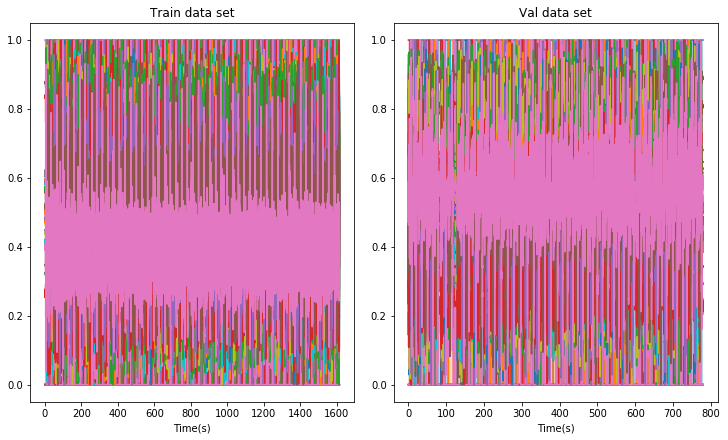

In [7]:
OnlineData.displaydata()

In [8]:
OnlineData.PrepareRNNdataset()

The dataset for RNN is prepared 
whose shape of train set is (80688, 100, 30) 
whose shape of val set is (38955, 100, 30)


# 1st RNN LSTM Model-LSTM(24)+LSTM(12)

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
model_rnn = Sequential()
model_rnn.add(LSTM(24, input_shape=(None,OnlineData.TRAIN_DATA_all.shape[2]),
                   return_sequences=True))
model_rnn.add(LSTM(12,return_sequences=False))
model_rnn.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],activation='softmax'))
model_rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 24)          5280      
_________________________________________________________________
lstm_4 (LSTM)                (None, 12)                1776      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 91        
Total params: 7,147
Trainable params: 7,147
Non-trainable params: 0
_________________________________________________________________


## 1 epoch train test without preprocess

In [42]:
history = model_rnn.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=1,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))

Train on 80688 samples, validate on 38955 samples
Epoch 1/1
80688/80688 [==============================] - 236s 3ms/step - loss: 0.0630 - acc: 0.6822 - val_loss: 0.1154 - val_acc: 0.4250


## 1 epoch train test with preprocess

In [8]:
history = model_rnn.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=1,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))

Train on 80688 samples, validate on 38955 samples
Epoch 1/1
80688/80688 [==============================] - 273s 3ms/step - loss: 0.1063 - acc: 0.4321 - val_loss: 0.0995 - val_acc: 0.4917


##  10 epoches train result with Minmax-preprocess

In [50]:
history2 = model_rnn.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=10,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))

Train on 80688 samples, validate on 38955 samples
Epoch 1/10
80688/80688 [==============================] - 235s 3ms/step - loss: 0.0785 - acc: 0.5840 - val_loss: 0.1029 - val_acc: 0.5521
Epoch 2/10
80688/80688 [==============================] - 243s 3ms/step - loss: 0.0651 - acc: 0.6437 - val_loss: 0.1003 - val_acc: 0.5470
Epoch 3/10
80688/80688 [==============================] - 238s 3ms/step - loss: 0.0540 - acc: 0.7179 - val_loss: 0.1104 - val_acc: 0.5448
Epoch 4/10
80688/80688 [==============================] - 233s 3ms/step - loss: 0.0378 - acc: 0.8222 - val_loss: 0.1069 - val_acc: 0.5765
Epoch 5/10
80688/80688 [==============================] - 243s 3ms/step - loss: 0.0257 - acc: 0.8858 - val_loss: 0.1049 - val_acc: 0.5921
Epoch 6/10
80688/80688 [==============================] - 248s 3ms/step - loss: 0.0195 - acc: 0.9145 - val_loss: 0.1094 - val_acc: 0.5863
Epoch 7/10
80688/80688 [==============================] - 235s 3ms/step - loss: 0.0164 - acc: 0.9289 - val_loss: 0.1090 - 

## 1st RNN model Overfitting!

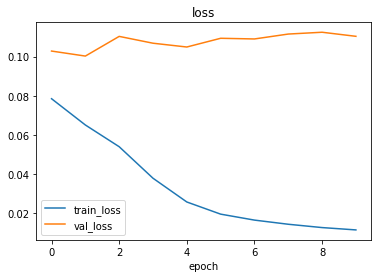

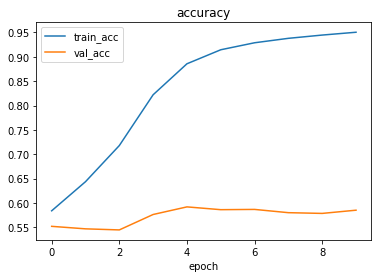

In [55]:
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.title('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()
plt.plot(history2.history['acc'], label='train_acc')
plt.plot(history2.history['val_acc'],label='val_acc')
plt.title('accuracy')
plt.legend()
plt.xlabel('epoch')
plt.show()

## Store 1st model architecture, weight and optimizer state.

In [57]:
model_rnn.save('../ModelLogs/RNN-10Epochs-LSTM(24)+LSTM(12).h5')

# 2nd RNN model-LSTM(24)+LSTM(12) with 0.25 dropout

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model_rnn2 = Sequential()
model_rnn2.add(LSTM(24, input_shape=(None,OnlineData.TRAIN_DATA_all.shape[2]),
                   return_sequences=True,dropout=0.25))
model_rnn2.add(LSTM(12,return_sequences=False,dropout=0.25))
model_rnn2.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],activation='softmax'))
model_rnn2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_rnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 24)          5280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 12)                1776      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 91        
Total params: 7,147
Trainable params: 7,147
Non-trainable params: 0
_________________________________________________________________


## 1 epoch train test without preprocess

In [11]:
history = model_rnn2.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=1,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))

Train on 80688 samples, validate on 38955 samples
Epoch 1/1
80688/80688 [==============================] - 273s 3ms/step - loss: 0.0974 - acc: 0.4941 - val_loss: 0.1017 - val_acc: 0.4863


## 1 epoch train test with preprocess(better)

In [12]:
history = model_rnn2.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=1,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))##  10 epoches train result with preprocess

Train on 80688 samples, validate on 38955 samples
Epoch 1/1
80688/80688 [==============================] - 251s 3ms/step - loss: 0.0903 - acc: 0.5369 - val_loss: 0.1008 - val_acc: 0.4843


##  10 epoches train result with Minmax-preprocess

In [10]:
TenEpochesWithDropout = model_rnn2.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=10,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))
model_rnn2.save('../ModelLogs/RNN-10Epochs-LSTM(24)+LSTM(12)-Dropout(0.25).h5')

Train on 80688 samples, validate on 38955 samples
Epoch 1/10
80688/80688 [==============================] - 287s 4ms/step - loss: 0.0973 - acc: 0.4956 - val_loss: 0.0980 - val_acc: 0.4907
Epoch 2/10
80688/80688 [==============================] - 272s 3ms/step - loss: 0.0898 - acc: 0.5405 - val_loss: 0.1023 - val_acc: 0.4844
Epoch 3/10
80688/80688 [==============================] - 265s 3ms/step - loss: 0.0867 - acc: 0.5547 - val_loss: 0.1050 - val_acc: 0.4721
Epoch 4/10
80688/80688 [==============================] - 263s 3ms/step - loss: 0.0841 - acc: 0.5681 - val_loss: 0.1012 - val_acc: 0.4872
Epoch 5/10
80688/80688 [==============================] - 265s 3ms/step - loss: 0.0820 - acc: 0.5774 - val_loss: 0.1025 - val_acc: 0.4807
Epoch 6/10
80688/80688 [==============================] - 265s 3ms/step - loss: 0.0797 - acc: 0.5880 - val_loss: 0.0998 - val_acc: 0.4907
Epoch 7/10
80688/80688 [==============================] - 270s 3ms/step - loss: 0.0769 - acc: 0.6025 - val_loss: 0.1078 - 

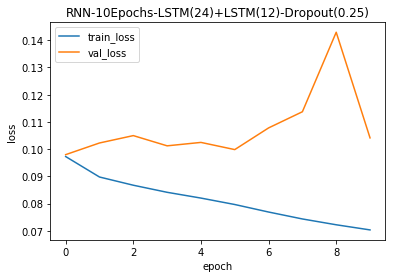

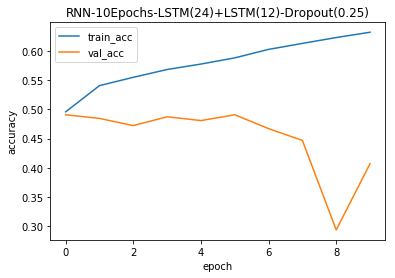

In [15]:
plt.plot(TenEpochesWithDropout.history['loss'], label='train_loss')
plt.plot(TenEpochesWithDropout.history['val_loss'],label='val_loss')
plt.title('RNN-10Epochs-LSTM(24)+LSTM(12)-Dropout(0.25)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.plot(TenEpochesWithDropout.history['acc'], label='train_acc')
plt.plot(TenEpochesWithDropout.history['val_acc'],label='val_acc')
plt.title('RNN-10Epochs-LSTM(24)+LSTM(12)-Dropout(0.25)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Scaning the AB185 subject is done.
30 channels of ['IMU'] data are selected:
Start stacking data...(Split data into train set and val set), and split ratio is  0.33
Finish stacking data of the 1 subjects: 52 trails
Done stacking data! 
Train dataset: (806884, 30) 
Val dataset: (389554, 30)
The preprocess method is AbsMax
.
..
...
Preprocess is done
Illustate  30 channels of data...


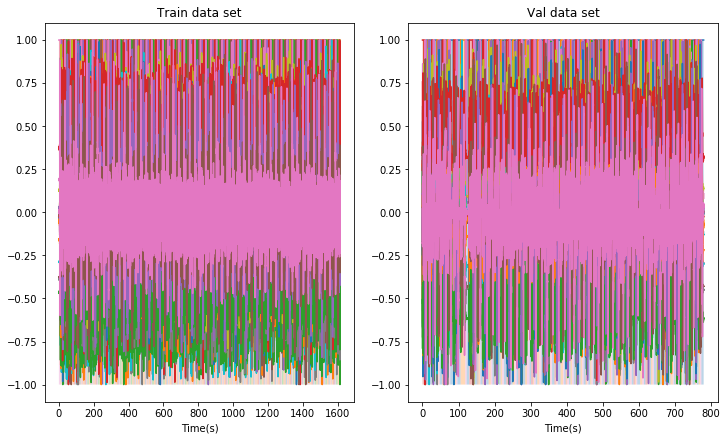

In [18]:
OnlineData = model.DATA(ReadALLSubjs=False,SplitData=True)
OnlineData.scandata(Subj=[1])
OnlineData.stackdata(ChooseSensors=['IMU'])
OnlineData.PreprocessData(Preprocess='AbsMax')
OnlineData.displaydata()

# 1st RNN LSTM Model-LSTM(24)+LSTM(12)

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
model_rnn = Sequential()
model_rnn.add(LSTM(24, input_shape=(None,OnlineData.TRAIN_DATA_all.shape[2]),
                   return_sequences=True))
model_rnn.add(LSTM(12,return_sequences=False))
model_rnn.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],activation='softmax'))
model_rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()
OnlineData.PrepareRNNdataset()
TenEpochesWithoutDropout = model_rnn.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=10,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))
model_rnn.save('../ModelLogs/RNN-10Epochs-LSTM(24)+LSTM(12)-AbsMax.h5')

Train on 80688 samples, validate on 38955 samples
Epoch 1/10
80688/80688 [==============================] - 295s 4ms/step - loss: 0.0638 - acc: 0.6694 - val_loss: 0.1055 - val_acc: 0.4705
Epoch 2/10
80688/80688 [==============================] - 306s 4ms/step - loss: 0.0490 - acc: 0.7601 - val_loss: 0.1012 - val_acc: 0.5486
Epoch 3/10
80688/80688 [==============================] - 288s 4ms/step - loss: 0.0432 - acc: 0.8046 - val_loss: 0.1091 - val_acc: 0.5205
Epoch 4/10
80688/80688 [==============================] - 280s 3ms/step - loss: 0.0315 - acc: 0.8617 - val_loss: 0.1016 - val_acc: 0.5765
Epoch 5/10
80688/80688 [==============================] - 256s 3ms/step - loss: 0.0268 - acc: 0.8820 - val_loss: 0.1022 - val_acc: 0.5824
Epoch 6/10
80688/80688 [==============================] - 266s 3ms/step - loss: 0.0214 - acc: 0.9074 - val_loss: 0.1052 - val_acc: 0.5811
Epoch 7/10
80688/80688 [==============================] - 261s 3ms/step - loss: 0.0208 - acc: 0.9095 - val_loss: 0.1041 - 

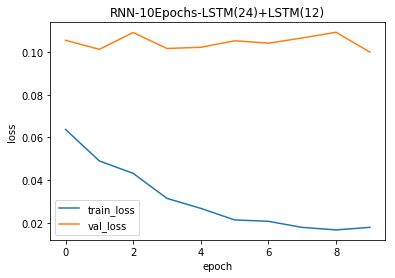

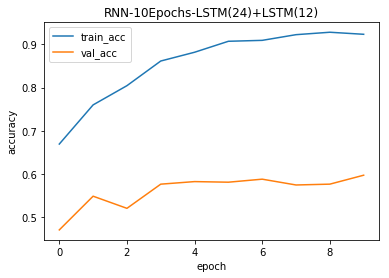

In [25]:
plt.plot(TenEpochesWithoutDropout.history['loss'], label='train_loss')
plt.plot(TenEpochesWithoutDropout.history['val_loss'],label='val_loss')
plt.title('RNN-10Epochs-LSTM(24)+LSTM(12)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.plot(TenEpochesWithoutDropout.history['acc'], label='train_acc')
plt.plot(TenEpochesWithoutDropout.history['val_acc'],label='val_acc')
plt.title('RNN-10Epochs-LSTM(24)+LSTM(12)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 2nd RNN model-LSTM(24)+LSTM(12) with 0.25 dropout

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model_rnn2 = Sequential()
model_rnn2.add(LSTM(24, input_shape=(None,OnlineData.TRAIN_DATA_all.shape[2]),
                   return_sequences=True,dropout=0.25))
model_rnn2.add(LSTM(12,return_sequences=False,dropout=0.25))
model_rnn2.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],activation='softmax'))
model_rnn2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_rnn2.summary()
TenEpochesWithDropout = model_rnn2.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=10,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))
model_rnn2.save('../ModelLogs/RNN-10Epochs-LSTM(24)+LSTM(12)-dropout(0.25)-AbsMax.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, None, 24)          5280      
_________________________________________________________________
lstm_6 (LSTM)                (None, 12)                1776      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 91        
Total params: 7,147
Trainable params: 7,147
Non-trainable params: 0
_________________________________________________________________
Train on 80688 samples, validate on 38955 samples
Epoch 1/10
80688/80688 [==============================] - 293s 4ms/step - loss: 0.0740 - acc: 0.5976 - val_loss: 0.0940 - val_acc: 0.5679
Epoch 2/10
80688/80688 [==============================] - 288s 4ms/step - loss: 0.0583 - acc: 0.6946 - val_loss: 0.0926 - val_acc: 0.6018
Epoch 3/10
80688/80688 [==============================] - 279s 3ms/step - loss

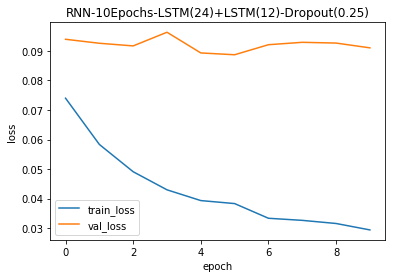

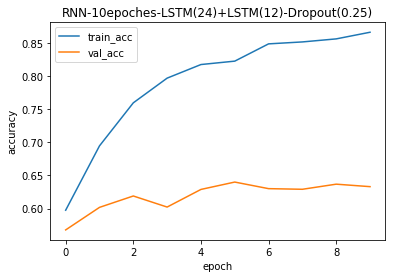

In [28]:
plt.plot(TenEpochesWithDropout.history['loss'], label='train_loss')
plt.plot(TenEpochesWithDropout.history['val_loss'],label='val_loss')
plt.title('RNN-10Epochs-LSTM(24)+LSTM(12)-Dropout(0.25)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.plot(TenEpochesWithDropout.history['acc'], label='train_acc')
plt.plot(TenEpochesWithDropout.history['val_acc'],label='val_acc')
plt.title('RNN-10epoches-LSTM(24)+LSTM(12)-Dropout(0.25)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 3rd RNN model-LSTM(24) with 0.5 dropout

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model_rnn3 = Sequential()
model_rnn3.add(LSTM(24, input_shape=(None,OnlineData.TRAIN_DATA_all.shape[2]),
                   dropout=0.5))
model_rnn3.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],activation='softmax'))
model_rnn3.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_rnn3.summary()
TenEpochesWithDropout = model_rnn3.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=10,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))
model_rnn3.save('../ModelLogs/RNN-10Epochs-LSTM(24)-dropout(0.5)-AbsMax.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 24)                5280      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 175       
Total params: 5,455
Trainable params: 5,455
Non-trainable params: 0
_________________________________________________________________
Train on 80688 samples, validate on 38955 samples
Epoch 1/10
80688/80688 [==============================] - 135s 2ms/step - loss: 0.0813 - acc: 0.5616 - val_loss: 0.1006 - val_acc: 0.5326
Epoch 2/10
80688/80688 [==============================] - 139s 2ms/step - loss: 0.0693 - acc: 0.6205 - val_loss: 0.0930 - val_acc: 0.5820
Epoch 3/10
80688/80688 [==============================] - 140s 2ms/step - loss: 0.0648 - acc: 0.6513 - val_loss: 0.0926 - val_acc: 0.5956
Epoch 4/10
80688/80688 [==============================] - 144s 2ms/step 

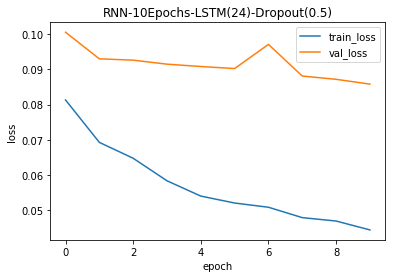

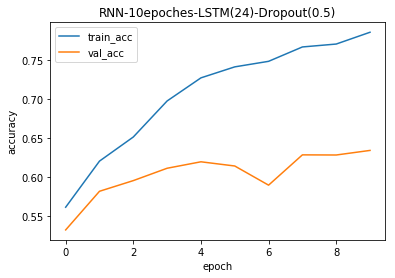

In [35]:
plt.plot(TenEpochesWithDropout.history['loss'], label='train_loss')
plt.plot(TenEpochesWithDropout.history['val_loss'],label='val_loss')
plt.title('RNN-10Epochs-LSTM(24)-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.plot(TenEpochesWithDropout.history['acc'], label='train_acc')
plt.plot(TenEpochesWithDropout.history['val_acc'],label='val_acc')
plt.title('RNN-10epoches-LSTM(24)-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 4th RNN model-LSTM(12) with 0.5 dropout

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model_rnn4 = Sequential()
model_rnn4.add(LSTM(12, input_shape=(OnlineData.TRAIN_DATA_all.shape[1],OnlineData.TRAIN_DATA_all.shape[2]),
                   dropout=0.5))
model_rnn4.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],activation='softmax'))
model_rnn4.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_rnn4.summary()
TenEpochesWithDropout = model_rnn4.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=10,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))
model_rnn4.save('../ModelLogs/RNN-10Epochs-LSTM(12)-dropout(0.5)-AbsMax.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 12)                2064      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 91        
Total params: 2,155
Trainable params: 2,155
Non-trainable params: 0
_________________________________________________________________
Train on 80688 samples, validate on 38955 samples
Epoch 1/10
80688/80688 [==============================] - 140s 2ms/step - loss: 0.0858 - acc: 0.5541 - val_loss: 0.0935 - val_acc: 0.5565
Epoch 2/10
80688/80688 [==============================] - 136s 2ms/step - loss: 0.0741 - acc: 0.5884 - val_loss: 0.0999 - val_acc: 0.5377
Epoch 3/10
80688/80688 [==============================] - 140s 2ms/step - loss: 0.0719 - acc: 0.5966 - val_loss: 0.1013 - val_acc: 0.5274
Epoch 4/10
80688/80688 [==============================] - 145s 2ms/step 

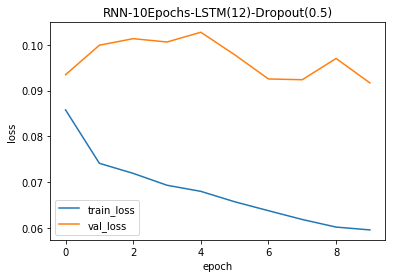

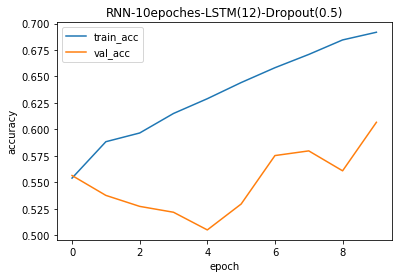

In [37]:
plt.plot(TenEpochesWithDropout.history['loss'], label='train_loss')
plt.plot(TenEpochesWithDropout.history['val_loss'],label='val_loss')
plt.title('RNN-10Epochs-LSTM(12)-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.plot(TenEpochesWithDropout.history['acc'], label='train_acc')
plt.plot(TenEpochesWithDropout.history['val_acc'],label='val_acc')
plt.title('RNN-10epoches-LSTM(12)-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 4th RNN model-LSTM(128+64) with 0.5 dropout

In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model_rnn5 = Sequential()
model_rnn5.add(LSTM(128, input_shape=(OnlineData.TRAIN_DATA_all.shape[1],OnlineData.TRAIN_DATA_all.shape[2]),
                  return_sequences=True, dropout=0.5))
model_rnn5.add(LSTM(64,dropout=0.5))
model_rnn5.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],activation='softmax'))
model_rnn5.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_rnn5.summary()
TenEpochesWithDropout = model_rnn5.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=10,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))
model_rnn5.save('../ModelLogs/RNN-10Epochs-LSTM(128+64)-dropout(0.5)-AbsMax.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 128)          81408     
_________________________________________________________________
lstm_16 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 455       
Total params: 131,271
Trainable params: 131,271
Non-trainable params: 0
_________________________________________________________________
Train on 80688 samples, validate on 38955 samples
Epoch 1/10
80688/80688 [==============================] - 406s 5ms/step - loss: 0.0788 - acc: 0.5756 - val_loss: 0.0974 - val_acc: 0.5461
Epoch 2/10
80688/80688 [==============================] - 410s 5ms/step - loss: 0.0568 - acc: 0.7073 - val_loss: 0.0885 - val_acc: 0.6189
Epoch 3/10
80688/80688 [==============================] - 405s 5ms/step - 

In [47]:
model_rnn5.weighted_metrics

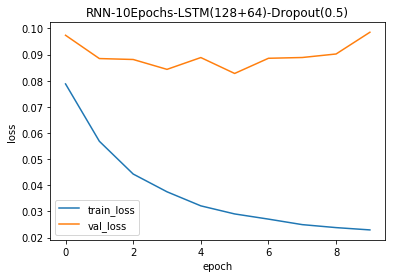

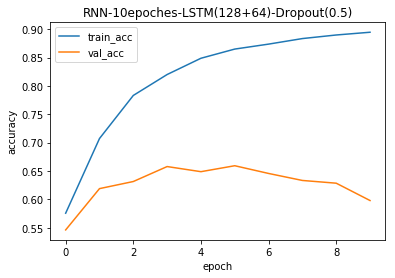

In [44]:
plt.plot(TenEpochesWithDropout.history['loss'], label='train_loss')
plt.plot(TenEpochesWithDropout.history['val_loss'],label='val_loss')
plt.title('RNN-10Epochs-LSTM(128+64)-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.plot(TenEpochesWithDropout.history['acc'], label='train_acc')
plt.plot(TenEpochesWithDropout.history['val_acc'],label='val_acc')
plt.title('RNN-10epoches-LSTM(128+64)-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()